In [1]:
import pandas as pd
import numpy as np

In [2]:
team_stats_path = '../data/external/team_stats.csv'
player_stats_path = '../data/processed/player_data_clean.csv'
player_team_path = '../data/interim/player_data_aggregated.csv'

team_stats = pd.read_csv(team_stats_path, header=1)
player_team = pd.read_csv(player_team_path)
player_stats = pd.read_csv(player_stats_path)

team_stats = team_stats[['Season', 'Team', 'W/L%']]
player_team = player_team[['season','player_id','player','tm']]
#player_stats.columns = player_stats.columns.str.replace('%', '')
player_stats['season'] = player_stats['season'].astype(int)
#player_stats['full_season'] = player_stats['season'].apply(lambda x: f"{x-1}-{str(x)[-2:]}")
#player_stats = pd.merge(player_stats, player_team, on=['seas_id', 'player_id'], how='left')

columns_drop = ['Unnamed: 0','seas_id','g','gs','age','experience']
player_stats = player_stats.drop(columns=columns_drop)

In [3]:
def weighted_avg(group, weight_col, stat_cols):
    d = {}
    for col in stat_cols:
        d[col] = (group[col] * group[weight_col]).sum() / group[weight_col].sum()
    d[weight_col] = group[weight_col].sum()
    return pd.Series(d)

In [4]:
team_stats.head()

,Season,Team,W/L%
0,2015-16,GSW,.890
1,1995-96,CHI,.878
2,1996-97,CHI,.841
3,2016-17,GSW,.817
4,2015-16,SAS,.817


In [5]:
player_team.head()

,season,player_id,player,tm
0,2024,5026,A.J. Lawson,DAL
1,2023,5026,A.J. Lawson,TOT
2,2023,5026,A.J. Lawson,MIN
3,2023,5026,A.J. Lawson,DAL
4,2024,5027,AJ Griffin,ATL


In [6]:
player_stats.head()

,season,player_id,player,tm,mp,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,...,bpm,vorp,person_id,height,weight,pos_PG,pos_SG,pos_PF,pos_SF,pos_C
0,2024,5026,A.J. Lawson,DAL,311,8.3,18.7,2.0,7.7,6.3,...,-4.6,-0.2,1630639,78,179.0,False,True,False,False,False
1,2023,5026,A.J. Lawson,TOT,108,10.1,20.2,4.6,11.5,5.5,...,-4.4,-0.1,1630639,78,179.0,False,True,False,False,False
2,2023,5026,A.J. Lawson,DAL,106,9.8,20.2,4.7,11.7,5.2,...,-4.6,-0.1,1630639,78,179.0,False,True,False,False,False
3,2024,5027,AJ Griffin,ATL,171,5.0,17.4,2.8,10.9,2.2,...,-9.6,-0.3,1631100,78,220.0,False,False,False,True,False
4,2023,5027,AJ Griffin,ATL,1401,8.4,18.1,3.4,8.8,5.0,...,-0.8,0.4,1631100,78,220.0,False,False,False,True,False


In [7]:
player_stat_temp = player_stats[['season','player_id','tm','mp']]
player_stat_temp.head()

,season,player_id,tm,mp
0,2024,5026,DAL,311
1,2023,5026,TOT,108
2,2023,5026,DAL,106
3,2024,5027,ATL,171
4,2023,5027,ATL,1401


In [8]:
player_metrics = ["fg_per_100_poss", "fga_per_100_poss", "x3p_per_100_poss", "x3pa_per_100_poss", "x2p_per_100_poss", "x2pa_per_100_poss", "ft_per_100_poss", "fta_per_100_poss", "orb_per_100_poss", "drb_per_100_poss", "trb_per_100_poss", "ast_per_100_poss", "stl_per_100_poss", "blk_per_100_poss", "tov_per_100_poss", "pf_per_100_poss", "pts_per_100_poss", "o_rtg", "d_rtg", "avg_dist_fga", "percent_fga_from_x2p_range", "percent_fga_from_x0_3_range", "percent_fga_from_x3_10_range", "percent_fga_from_x10_16_range", "percent_fga_from_x16_3p_range", "percent_fga_from_x3p_range", "fg_percent_from_x2p_range", "fg_percent_from_x0_3_range", "fg_percent_from_x3_10_range", "fg_percent_from_x10_16_range", "fg_percent_from_x16_3p_range", "fg_percent_from_x3p_range", "percent_assisted_x2p_fg", "percent_assisted_x3p_fg", "percent_dunks_of_fga", "num_of_dunks", "percent_corner_3s_of_3pa", "corner_3_point_percent", "num_heaves_attempted", "num_heaves_made", "per", "x3p_ar", "f_tr", "orb_percent", "drb_percent", "trb_percent", "ast_percent", "stl_percent", "blk_percent", "tov_percent", "usg_percent", "ows", "dws", "ws", "ws_48", "obpm", "dbpm", "bpm", "vorp"
]

In [9]:
result = player_stats.groupby(['season','player_id']).apply(weighted_avg, weight_col='mp', stat_cols=player_metrics).reset_index()
result.head()

,season,player_id,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,x2pa_per_100_poss,ft_per_100_poss,fta_per_100_poss,...,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,mp
0,1997,1723,9.200000,18.800000,0.000000,0.000000,9.200000,18.800000,2.80000,4.100000,...,20.300000,0.300000,0.600000,0.900000,0.101000,-2.000000,-0.700000,-2.700000,-0.100000,406.0
1,1997,1813,6.600000,16.800000,1.700000,4.900000,4.900000,11.900000,3.60000,4.000000,...,18.500000,-0.100000,0.200000,0.100000,0.015000,-3.000000,-1.500000,-4.500000,-0.200000,370.0
2,1997,1978,3.100000,7.500000,0.000000,0.000000,3.100000,7.500000,2.20000,3.000000,...,10.000000,0.000000,0.300000,0.300000,0.028000,-5.100000,-1.700000,-6.800000,-0.600000,516.0
3,1997,1981,6.200000,11.600000,0.000000,0.000000,6.200000,11.500000,4.10000,6.300000,...,14.900000,2.100000,2.800000,4.800000,0.155000,-1.000000,1.100000,0.100000,0.800000,1496.0
4,1997,1993,9.284885,21.004107,2.831599,7.579682,6.436528,13.407667,3.18379,3.917853,...,21.987349,0.749179,0.699726,1.448905,0.092772,-0.519222,-1.282968,-1.802191,0.049726,1826.0


In [10]:
result['season'] = result['season'] + 1
result.head()

,season,player_id,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,x2pa_per_100_poss,ft_per_100_poss,fta_per_100_poss,...,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,mp
0,1998,1723,9.200000,18.800000,0.000000,0.000000,9.200000,18.800000,2.80000,4.100000,...,20.300000,0.300000,0.600000,0.900000,0.101000,-2.000000,-0.700000,-2.700000,-0.100000,406.0
1,1998,1813,6.600000,16.800000,1.700000,4.900000,4.900000,11.900000,3.60000,4.000000,...,18.500000,-0.100000,0.200000,0.100000,0.015000,-3.000000,-1.500000,-4.500000,-0.200000,370.0
2,1998,1978,3.100000,7.500000,0.000000,0.000000,3.100000,7.500000,2.20000,3.000000,...,10.000000,0.000000,0.300000,0.300000,0.028000,-5.100000,-1.700000,-6.800000,-0.600000,516.0
3,1998,1981,6.200000,11.600000,0.000000,0.000000,6.200000,11.500000,4.10000,6.300000,...,14.900000,2.100000,2.800000,4.800000,0.155000,-1.000000,1.100000,0.100000,0.800000,1496.0
4,1998,1993,9.284885,21.004107,2.831599,7.579682,6.436528,13.407667,3.18379,3.917853,...,21.987349,0.749179,0.699726,1.448905,0.092772,-0.519222,-1.282968,-1.802191,0.049726,1826.0


In [11]:
result.drop(columns=['mp'],inplace=True)
result.head()

,season,player_id,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,x2pa_per_100_poss,ft_per_100_poss,fta_per_100_poss,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,1998,1723,9.200000,18.800000,0.000000,0.000000,9.200000,18.800000,2.80000,4.100000,...,15.200000,20.300000,0.300000,0.600000,0.900000,0.101000,-2.000000,-0.700000,-2.700000,-0.100000
1,1998,1813,6.600000,16.800000,1.700000,4.900000,4.900000,11.900000,3.60000,4.000000,...,15.700000,18.500000,-0.100000,0.200000,0.100000,0.015000,-3.000000,-1.500000,-4.500000,-0.200000
2,1998,1978,3.100000,7.500000,0.000000,0.000000,3.100000,7.500000,2.20000,3.000000,...,24.900000,10.000000,0.000000,0.300000,0.300000,0.028000,-5.100000,-1.700000,-6.800000,-0.600000
3,1998,1981,6.200000,11.600000,0.000000,0.000000,6.200000,11.500000,4.10000,6.300000,...,16.300000,14.900000,2.100000,2.800000,4.800000,0.155000,-1.000000,1.100000,0.100000,0.800000
4,1998,1993,9.284885,21.004107,2.831599,7.579682,6.436528,13.407667,3.18379,3.917853,...,10.699452,21.987349,0.749179,0.699726,1.448905,0.092772,-0.519222,-1.282968,-1.802191,0.049726


In [12]:
result[(result['season'] == 2023) & (result['player_id'] == 5026)]

,season,player_id,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,x2pa_per_100_poss,ft_per_100_poss,fta_per_100_poss,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp


In [13]:
player_stats_adjusted = player_stats.copy()
player_stats_adjusted['full_season'] = player_stats_adjusted['season'].apply(lambda x: f"{x-1}-{str(x)[-2:]}")
player_stats_adjusted = player_stats_adjusted[player_stats_adjusted['season'] != 1997]
player_stats_adjusted.head()

,season,player_id,player,tm,mp,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,...,vorp,person_id,height,weight,pos_PG,pos_SG,pos_PF,pos_SF,pos_C,full_season
0,2024,5026,A.J. Lawson,DAL,311,8.3,18.7,2.0,7.7,6.3,...,-0.2,1630639,78,179.0,False,True,False,False,False,2023-24
1,2023,5026,A.J. Lawson,TOT,108,10.1,20.2,4.6,11.5,5.5,...,-0.1,1630639,78,179.0,False,True,False,False,False,2022-23
2,2023,5026,A.J. Lawson,DAL,106,9.8,20.2,4.7,11.7,5.2,...,-0.1,1630639,78,179.0,False,True,False,False,False,2022-23
3,2024,5027,AJ Griffin,ATL,171,5.0,17.4,2.8,10.9,2.2,...,-0.3,1631100,78,220.0,False,False,False,True,False,2023-24
4,2023,5027,AJ Griffin,ATL,1401,8.4,18.1,3.4,8.8,5.0,...,0.4,1631100,78,220.0,False,False,False,True,False,2022-23


In [14]:
merged_df = pd.merge(player_stats_adjusted, result, on=['season', 'player_id'], suffixes=('', '_df2'), how='left')

for field in player_metrics:
    merged_df[field] = merged_df[field + '_df2'].combine_first(merged_df[field])

merged_df.drop(columns=[field + '_df2' for field in player_metrics], inplace=True)

In [15]:
player_year_adjust = merged_df.copy()
player_year_adjust

,season,player_id,player,tm,mp,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,...,vorp,person_id,height,weight,pos_PG,pos_SG,pos_PF,pos_SF,pos_C,full_season
0,2024,5026,A.J. Lawson,DAL,311,9.951402,20.200000,4.649533,11.599065,5.351402,...,-0.100000,1630639,78,179.0,False,True,False,False,False,2023-24
1,2023,5026,A.J. Lawson,TOT,108,10.100000,20.200000,4.600000,11.500000,5.500000,...,-0.100000,1630639,78,179.0,False,True,False,False,False,2022-23
2,2023,5026,A.J. Lawson,DAL,106,9.800000,20.200000,4.700000,11.700000,5.200000,...,-0.100000,1630639,78,179.0,False,True,False,False,False,2022-23
3,2024,5027,AJ Griffin,ATL,171,8.400000,18.100000,3.400000,8.800000,5.000000,...,0.400000,1631100,78,220.0,False,False,False,True,False,2023-24
4,2023,5027,AJ Griffin,ATL,1401,8.400000,18.100000,3.400000,8.800000,5.000000,...,0.400000,1631100,78,220.0,False,False,False,True,False,2022-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11214,1998,2465,Scott Brooks,CLE,312,4.000000,8.200000,1.100000,2.500000,3.000000,...,0.200000,418,71,165.0,True,False,False,False,False,1997-98
11215,1998,2752,Stephen Howard,SEA,53,8.127510,14.209518,0.000000,0.000000,8.127510,...,0.054498,1128,81,225.0,False,False,False,True,False,1997-98
11216,1998,2399,Vincent Askew,POR,443,5.200000,12.000000,0.500000,1.549518,4.750482,...,0.049518,355,78,210.0,False,True,False,False,False,1997-98
11217,1998,2278,Xavier McDaniel,NJN,180,6.100000,15.800000,0.200000,1.100000,5.900000,...,-0.700000,1365,79,205.0,False,False,False,True,False,1997-98


In [17]:
N = 8
final_data = []

team_stats_adjusted = team_stats[team_stats['Season'] != '1996-97']

for (season, team), group in player_year_adjust.groupby(['full_season', 'tm']):
    # Sort players by a criterion, e.g., minutes played (assuming 'MP' column exists)
    top_players = group.sort_values(by='mp', ascending=False).head(N)
    
    # Create a dictionary to hold the data for this team-season
    team_data = {'Season': season, 'Team': team}
    
    # Add team stats
    team_stats_row = team_stats_adjusted[(team_stats_adjusted['Season'] == season) & (team_stats_adjusted['Team'] == team)]
    if not team_stats_row.empty:
        team_data.update(team_stats_row.iloc[0].to_dict())
    
    # Add player metrics
    for i, player in enumerate(top_players.itertuples(), start=1):
        for metric in player_metrics:
            team_data[f'Player{i}_{metric}'] = getattr(player, metric) if hasattr(player, metric) else player._asdict().get(metric, 0)
    
    # Fill missing player slots with zeros if less than N players
    for i in range(len(top_players) + 1, N + 1):
        for metric in player_metrics:
            team_data[f'Player{i}_{metric}'] = 0
    
    # Append the team data to the list
    final_data.append(team_data)

In [18]:
final_data_df = pd.DataFrame(final_data)
final_data_df = final_data_df.dropna(subset=['W/L%'])
final_data_df = final_data_df.dropna()
final_data_df

,Season,Team,W/L%,Player1_fg_per_100_poss,Player1_fga_per_100_poss,Player1_x3p_per_100_poss,Player1_x3pa_per_100_poss,Player1_x2p_per_100_poss,Player1_x2pa_per_100_poss,Player1_ft_per_100_poss,...,Player8_tov_percent,Player8_usg_percent,Player8_ows,Player8_dws,Player8_ws,Player8_ws_48,Player8_obpm,Player8_dbpm,Player8_bpm,Player8_vorp
0,1997-98,ATL,.610,7.1,13.4,0.0,0.0,7.1,13.4,5.7,...,28.400000,16.700000,-0.8,1.1,0.3,0.012000,-4.000000,0.300000,-3.700000,-0.4
1,1997-98,BOS,.439,9.7,22.9,0.9,2.7,8.8,20.2,3.9,...,18.100000,21.700000,1.6,1.0,2.6,0.096000,1.200000,-0.400000,0.800000,0.9
2,1997-98,CHH,.622,11.6,24.4,3.3,7.1,8.3,17.3,7.5,...,27.500000,16.000000,-0.3,0.7,0.4,0.028000,-3.700000,0.800000,-2.900000,-0.2
3,1997-98,CHI,.756,15.8,32.5,1.9,5.1,13.9,27.4,8.2,...,14.100000,12.100000,0.1,1.1,1.2,0.082000,-1.700000,0.900000,-0.900000,0.2
4,1997-98,CLE,.573,9.1,20.0,3.8,9.2,5.3,10.8,2.0,...,10.100000,17.600000,2.2,3.4,5.6,0.102000,-0.600000,0.200000,-0.400000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2023-24,POR,.256,12.5,21.3,0.2,0.6,12.4,20.7,3.7,...,10.203093,21.348454,0.7,0.4,1.1,0.181969,0.748454,-1.249485,-0.501031,0.1
824,2023-24,SAC,.561,10.1,16.4,0.5,1.5,9.5,15.0,5.7,...,10.100000,19.000000,-0.5,0.4,0.0,-0.003000,-2.900000,-1.600000,-4.500000,-0.6
825,2023-24,SAS,.268,8.1,17.9,1.1,4.3,7.0,13.5,2.6,...,9.500000,19.200000,1.0,0.0,1.0,0.035000,-0.700000,-2.600000,-3.200000,-0.4
826,2023-24,TOR,.305,8.5,18.8,1.2,4.1,7.4,14.6,3.5,...,6.400000,18.000000,3.0,2.0,5.0,0.156000,0.700000,-0.800000,-0.100000,0.7


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
data = final_data_df.copy()

In [22]:
X = data.drop(columns=['W/L%', 'Season', 'Team'])
y = data['W/L%']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.4f}, R²: {r2:.4f}")

Linear Regression - MSE: 0.0307, R²: -0.5832


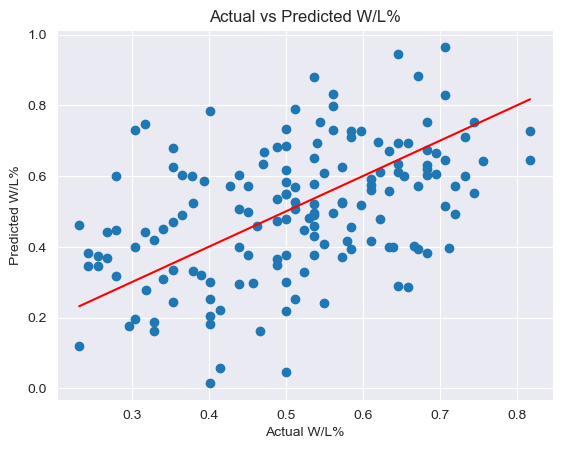

In [27]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual W/L%')
plt.ylabel('Predicted W/L%')
plt.title('Actual vs Predicted W/L%')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()

In [28]:
df = player_year_adjust.copy()
df

,season,player_id,player,tm,mp,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,...,vorp,person_id,height,weight,pos_PG,pos_SG,pos_PF,pos_SF,pos_C,full_season
0,2024,5026,A.J. Lawson,DAL,311,9.951402,20.200000,4.649533,11.599065,5.351402,...,-0.100000,1630639,78,179.0,False,True,False,False,False,2023-24
1,2023,5026,A.J. Lawson,TOT,108,10.100000,20.200000,4.600000,11.500000,5.500000,...,-0.100000,1630639,78,179.0,False,True,False,False,False,2022-23
2,2023,5026,A.J. Lawson,DAL,106,9.800000,20.200000,4.700000,11.700000,5.200000,...,-0.100000,1630639,78,179.0,False,True,False,False,False,2022-23
3,2024,5027,AJ Griffin,ATL,171,8.400000,18.100000,3.400000,8.800000,5.000000,...,0.400000,1631100,78,220.0,False,False,False,True,False,2023-24
4,2023,5027,AJ Griffin,ATL,1401,8.400000,18.100000,3.400000,8.800000,5.000000,...,0.400000,1631100,78,220.0,False,False,False,True,False,2022-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11214,1998,2465,Scott Brooks,CLE,312,4.000000,8.200000,1.100000,2.500000,3.000000,...,0.200000,418,71,165.0,True,False,False,False,False,1997-98
11215,1998,2752,Stephen Howard,SEA,53,8.127510,14.209518,0.000000,0.000000,8.127510,...,0.054498,1128,81,225.0,False,False,False,True,False,1997-98
11216,1998,2399,Vincent Askew,POR,443,5.200000,12.000000,0.500000,1.549518,4.750482,...,0.049518,355,78,210.0,False,True,False,False,False,1997-98
11217,1998,2278,Xavier McDaniel,NJN,180,6.100000,15.800000,0.200000,1.100000,5.900000,...,-0.700000,1365,79,205.0,False,False,False,True,False,1997-98


In [29]:
def weighted_avg_2(group, weight_col, stat_cols):
    d = {}
    for col in stat_cols:
        d[col] = (group[col] * group[weight_col]).sum() / group[weight_col].sum()
    return pd.Series(d)

In [30]:
results = []
position_columns = ['pos_PG', 'pos_SG', 'pos_PF', 'pos_SF', 'pos_C']
stat_columns = player_metrics

# Loop through each position
for pos in position_columns:
    # Filter the DataFrame for players playing the current position
    df_pos = df[df[pos] == 1]
    
    # Group by team and season, and apply the weighted average function
    grouped = df_pos.groupby(['full_season', 'tm']).apply(weighted_avg_2, weight_col='mp', stat_cols=stat_columns).reset_index()
    
    # Add position prefix to the stat columns
    grouped = grouped.rename(columns={col: f'{pos}_{col}' for col in stat_columns})
    
    # Append the result to the results list
    results.append(grouped)


In [31]:
# Start with the first result as the base DataFrame
final_df = results[0]

# Merge the rest of the results into the base DataFrame
for df_pos in results[1:]:
    final_df = final_df.merge(df_pos, on=['full_season', 'tm'], how='outer')

final_df = final_df.merge(team_stats, left_on=['full_season', 'tm'], right_on=['Season', 'Team'], how='left')
final_df = final_df.dropna(subset=['W/L%'])
final_df = final_df.dropna()

final_df

,full_season,tm,pos_PG_fg_per_100_poss,pos_PG_fga_per_100_poss,pos_PG_x3p_per_100_poss,pos_PG_x3pa_per_100_poss,pos_PG_x2p_per_100_poss,pos_PG_x2pa_per_100_poss,pos_PG_ft_per_100_poss,pos_PG_fta_per_100_poss,...,pos_C_dws,pos_C_ws,pos_C_ws_48,pos_C_obpm,pos_C_dbpm,pos_C_bpm,pos_C_vorp,Season,Team,W/L%
1,1997-98,BOS,7.260762,17.634528,2.348459,6.420697,4.870058,11.213831,4.594588,5.578351,...,1.246365,2.444382,0.103279,-3.005288,-0.304627,-3.309914,-0.352974,1997-98,BOS,.439
2,1997-98,CHH,7.210241,15.574443,1.357956,4.001975,5.852285,11.572468,3.628197,4.573456,...,3.583232,6.709271,0.121801,0.385968,1.777406,2.071935,3.017477,1997-98,CHH,.622
3,1997-98,CHI,5.968318,13.870941,1.464821,4.228767,4.503498,9.708744,2.167735,3.068318,...,0.717859,1.224547,0.077017,-3.796097,-0.156843,-3.929552,-0.357671,1997-98,CHI,.756
4,1997-98,CLE,4.000000,8.200000,1.100000,2.500000,3.000000,5.700000,3.000000,3.200000,...,3.708125,6.085096,0.126054,-1.569982,0.053047,-1.579689,0.796386,1997-98,CLE,.573
5,1997-98,DAL,6.590216,17.010461,2.510403,6.967061,4.090458,10.037456,2.986298,3.922465,...,1.660139,1.539976,0.052147,-2.863951,0.772142,-2.057897,0.151702,1997-98,DAL,.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2023-24,PHO,12.329076,25.415729,2.682672,7.579279,9.723112,17.830651,6.940391,8.252743,...,1.314451,3.582312,0.136331,-0.764220,0.692601,0.002486,0.624798,2023-24,PHO,.598
818,2023-24,SAC,11.233138,22.393351,2.241436,6.995027,8.991702,15.327606,4.972367,6.374574,...,2.631317,10.980427,0.203093,2.914947,1.694662,4.509609,4.675801,2023-24,SAC,.561
819,2023-24,SAS,7.960257,17.881132,1.817210,6.020388,6.140702,11.858399,2.828791,3.357583,...,0.831468,1.802151,0.076246,-0.644230,0.065515,-0.578714,0.434068,2023-24,SAS,.268
820,2023-24,TOR,8.347209,18.135814,2.882558,7.871163,5.464651,10.282326,3.559070,4.417907,...,1.690149,4.031200,0.126941,0.225670,0.551640,0.720354,1.087886,2023-24,TOR,.305


In [32]:
final_df.to_csv('../data/processed/roster_stats.csv', index=False)

Linear Regression - MSE: 0.0126, R²: 0.3385


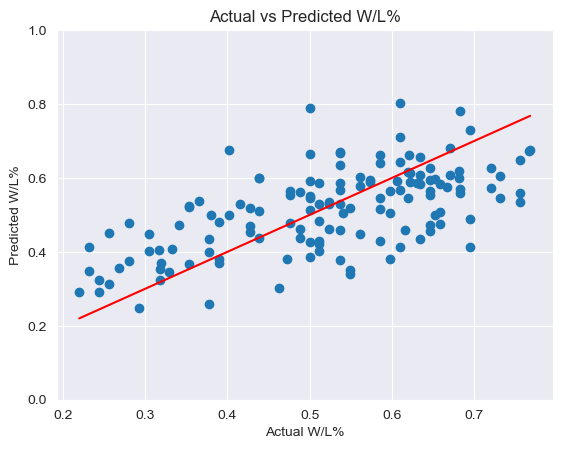

In [35]:
data_path = '../data/processed/roster_stats.csv'
data = pd.read_csv(data_path)

X = data.drop(columns=['W/L%', 'full_season', 'Season', 'tm', 'Team'])
y = data['W/L%']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
#model = LinearRegression()
model = Ridge(alpha=100)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.4f}, R²: {r2:.4f}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual W/L%')
plt.ylabel('Predicted W/L%')
plt.title('Actual vs Predicted W/L%')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.ylim(0,1)
plt.show()

Linear Regression - MSE: 0.0059, R²: 0.6976


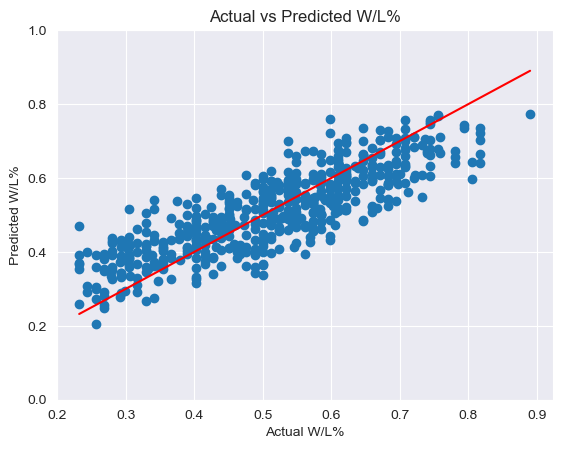

In [34]:
# Predict on the test set
y_pred_train = model.predict(X_train_scaled)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print(f"Linear Regression - MSE: {mse:.4f}, R²: {r2:.4f}")

# Plot actual vs predicted values
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual W/L%')
plt.ylabel('Predicted W/L%')
plt.title('Actual vs Predicted W/L%')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Line of perfect prediction
plt.ylim(0,1)
plt.show()